<a href="https://colab.research.google.com/github/DonYosef2/ApuntesJava/blob/master/Medical_Cost_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FASE 1 : COMPRENDER EL NEGOCIO

Para desarrollar los mejores productos de seguro médico, la aseguradora necesita acceso a datos históricos para aproximar los costos médicos de cada usuario. Con estos datos, una aseguradora médica puede desarrollar modelos de precios más precisos, planificar un resultado de seguro particular o gestionar grandes carteras. Para todos estos casos, el objetivo es predecir con precisión los costes del seguro.



El objetivo es entrenar un modelo de regresión de ML que genere los _cargos_ de la columna objetivo con mayor precisión. Al ser un problema de modelo de regresión, para evaluar el modelo se utilizan métricas como el coeficiente de determinación y el error cuadrático medio.

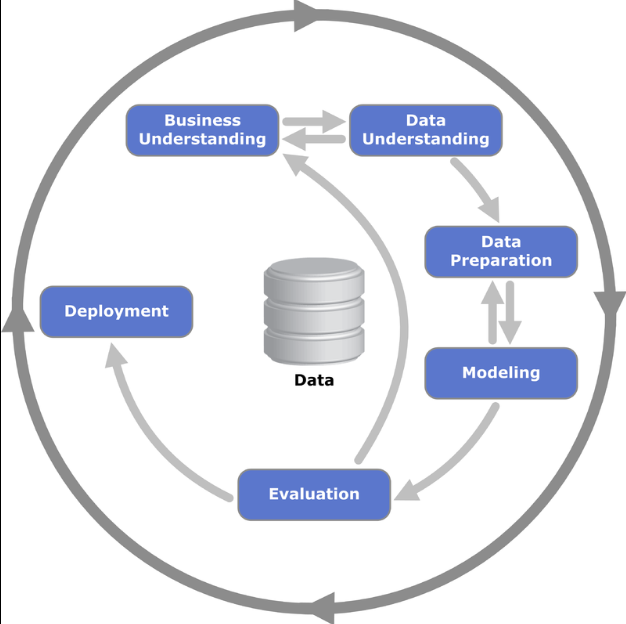

# FASE 2 : COMPRENDER LO DATOS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# **
# Leer el archivo insurance.csv
#
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
data = pd.read_csv(name, sep=",")

Saving insurance.csv to insurance.csv


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### No hay valores faltantes como tal.




In [ ]:
data['region'].value_counts().sort_values()

region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64

In [ ]:
data['children'].value_counts().sort_values()

children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64

In [18]:
for col in data.columns:
    print('Total de valors nulos de la coumna', col, '=', data[col].isna().sum())

Total de valors nulos de la coumna age = 0
Total de valors nulos de la coumna sex = 0
Total de valors nulos de la coumna bmi = 0
Total de valors nulos de la coumna children = 0
Total de valors nulos de la coumna smoker = 0
Total de valors nulos de la coumna region = 0
Total de valors nulos de la coumna charges = 0


###Conversión de características categóricas a numérica





In [ ]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

In [ ]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


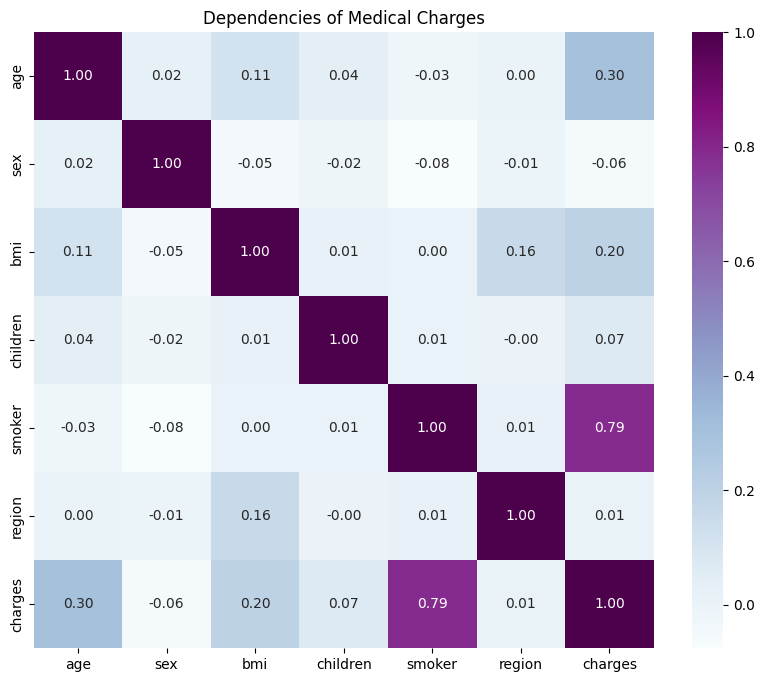

In [ ]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

### El fumador, el IMC y la edad son los factores más importantes que determinan - Cargo

También vemos que Sexo, Niños y Región no afectan los Cargos.
Podríamos eliminar estas 3 columnas ya que tienen menos correlación.

In [ ]:
print(data['sex'].value_counts().sort_values())
print(data['children'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

sex
female    662
male      676
Name: count, dtype: int64
children
5     18
4     25
3    157
2    240
1    324
0    574
Name: count, dtype: int64
region
northeast    324
southwest    325
northwest    325
southeast    364
Name: count, dtype: int64


### Ahora estamos confirmados que no hay otros valores en la columna preprocesada anterior. Podemos continuar con el analis exploratorio.


<ipython-input-14-b75262705462>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='charges',data=data_copy,palette='husl')


<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

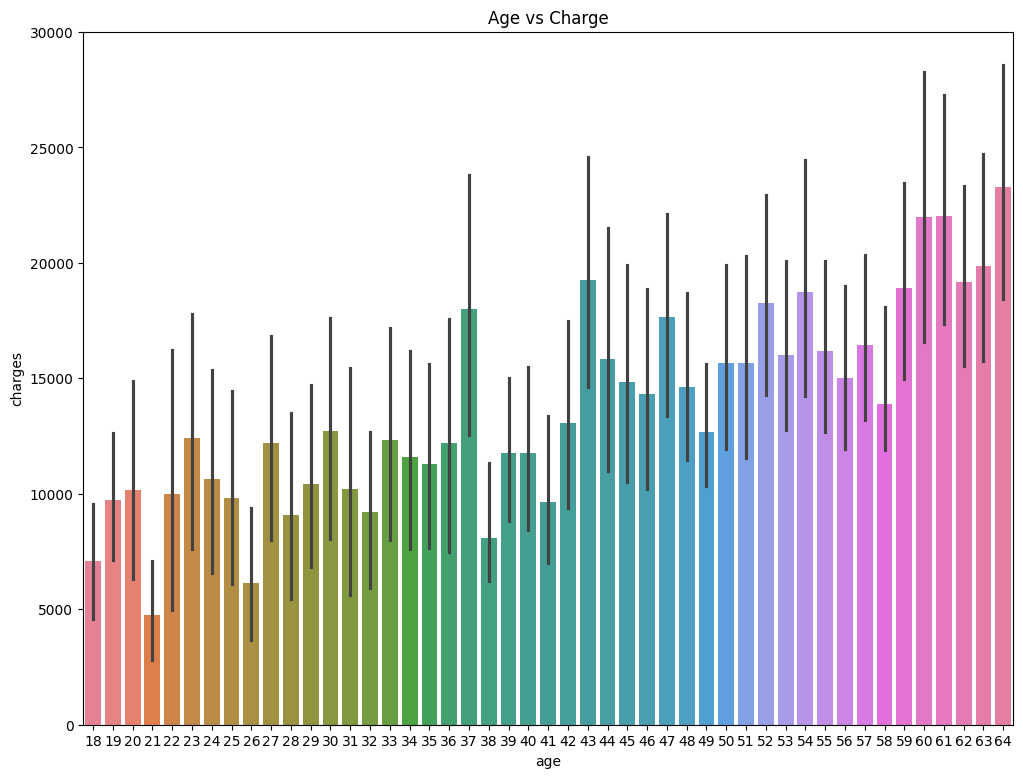

In [ ]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')

<ipython-input-15-66a42206e8ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

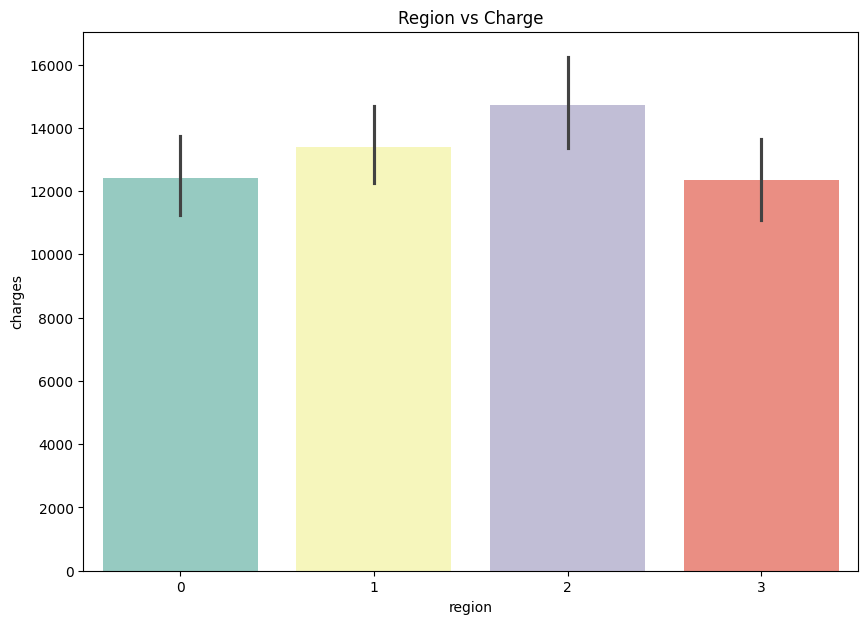

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

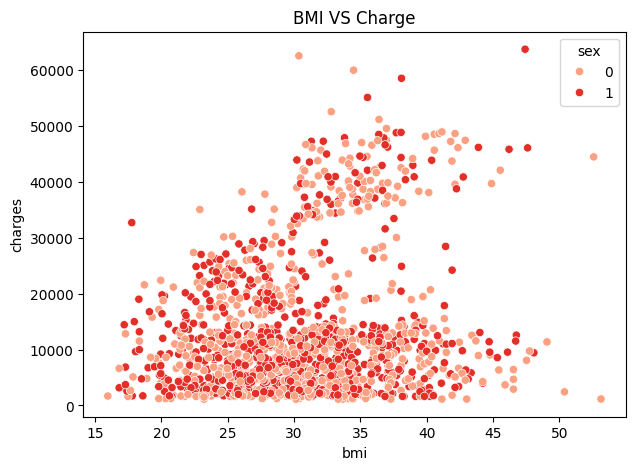

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

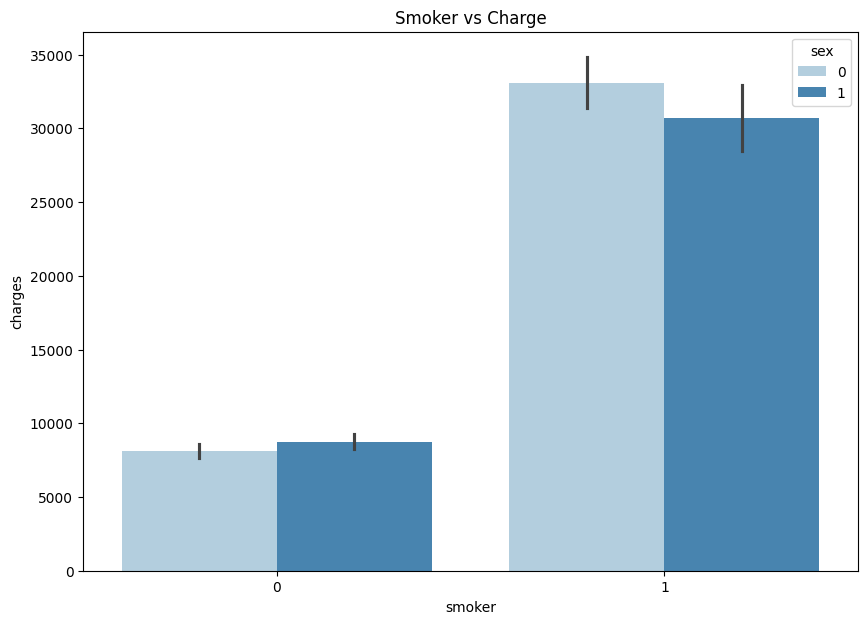

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')

<ipython-input-18-d23f27046bd9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')


<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

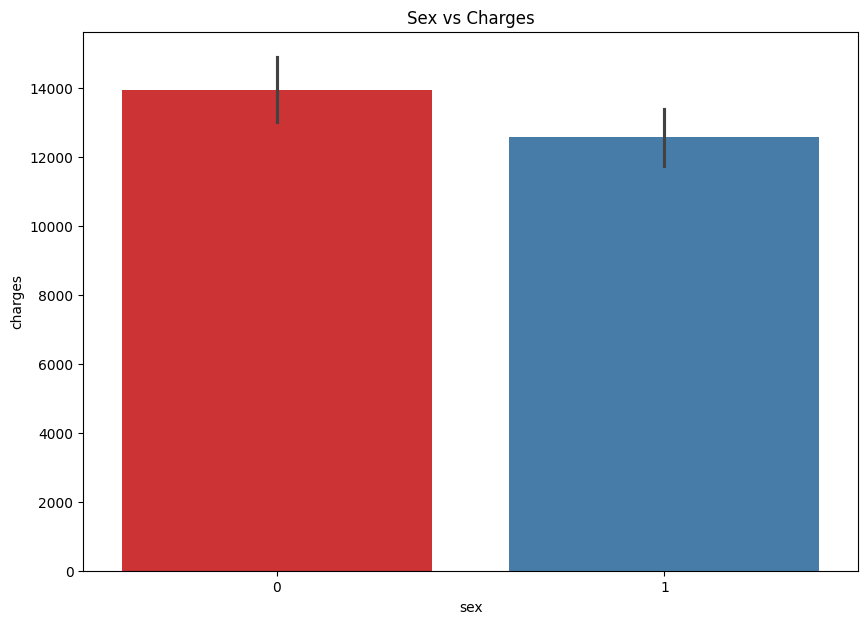

In [ ]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')

Sesgo y Curtosis

In [19]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
charges : Skewness 1.516 and  Kurtosis 1.606


# FASE 3 : PREPARAR LOS DATOS
Puede haber algunos valores atípicos en los cargos, pero no podemos decir que el valor sea un valor atípico, ya que puede haber casos en los que los cargos por gastos médicos en realidad sean muy bajos.
Preparando datos: podemos escalar el IMC y la columna de cargos antes de continuar con la predicción

In [21]:
from sklearn.preprocessing import StandardScaler
data_pre = data_copy.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,3,0.298584
1,-1.509965,0,0.509621,1,0,2,-0.953689
2,-0.797954,0,0.383307,3,0,2,-0.728675
3,-0.441948,0,-1.305531,0,0,0,0.719843
4,-0.513149,0,-0.292556,0,0,0,-0.776802


In [22]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


## Importando Librerias

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# FASE 4: MODELAMIENTO


## Regresion Linear

In [26]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: user 6.52 ms, sys: 1.09 ms, total: 7.61 ms
Wall time: 41.7 ms


LinearRegression()

In [30]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.745
R2_score (train) : 0.741
R2_score (test) : 0.783
RMSE : 0.480


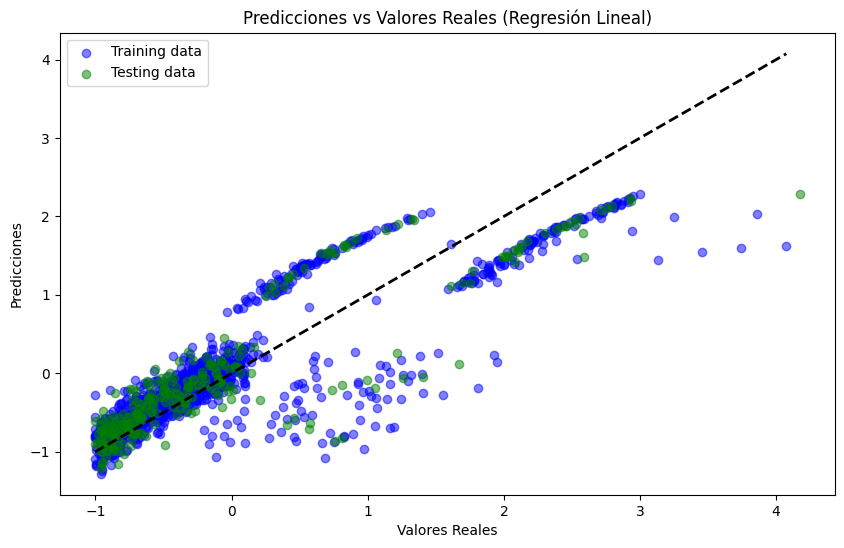

In [85]:

# Graficar los resultados de entrenamiento
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_linear_reg_train, color='blue', label='Training data', alpha=0.5)

# Graficar los resultados de prueba
plt.scatter(y_test, y_pred_linear_reg_test, color='green', label='Testing data', alpha=0.5)

# Línea diagonal ideal
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Regresión Lineal)')
plt.legend()
plt.show()

###Support Vector Machine (Regression)

In [35]:
X_c = data_copy.drop('charges',axis=1).values
y_c = data_copy['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

svr = SVR()
#svr.fit(X_train_scaled, y_train_scaled.ravel())

In [39]:
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [42]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=10, gamma=0.1, tol=0.0001)
0.8311276912561502


In [43]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.831
R2_score (train) : 0.857
R2 score (test) : 0.871
RMSE : 0.359


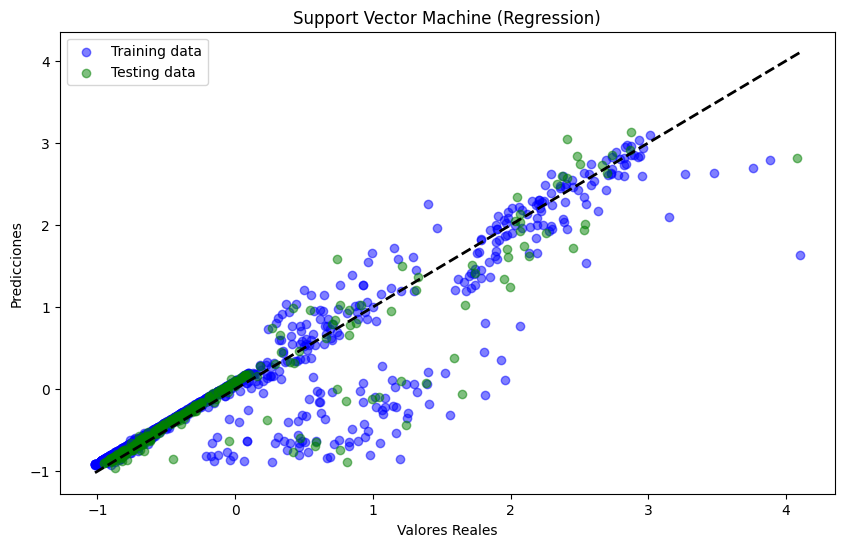

In [86]:
# Graficar los resultados de entrenamiento
plt.figure(figsize=(10, 6))
plt.scatter(y_train_scaled, y_pred_svr_train, color='blue', label='Training data', alpha=0.5)

# Graficar los resultados de prueba
plt.scatter(y_test_scaled, y_pred_svr_test, color='green', label='Testing data', alpha=0.5)

# Línea diagonal ideal
plt.plot([y_train_scaled.min(), y_train_scaled.max()], [y_train_scaled.min(), y_train_scaled.max()], 'k--', lw=2)

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Support Vector Machine (Regression)')
plt.legend()
plt.show()

## Regresion Ridge

In [44]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [45]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.25803e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.14414e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.16968e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [46]:
reg_ridge.best_estimator_, reg_ridge.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 0.8259990140429396)

In [47]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())
cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))
print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

CV : 0.826
R2 score (train) : 0.741
R2 score (test) : 0.784
RMSE : 0.465


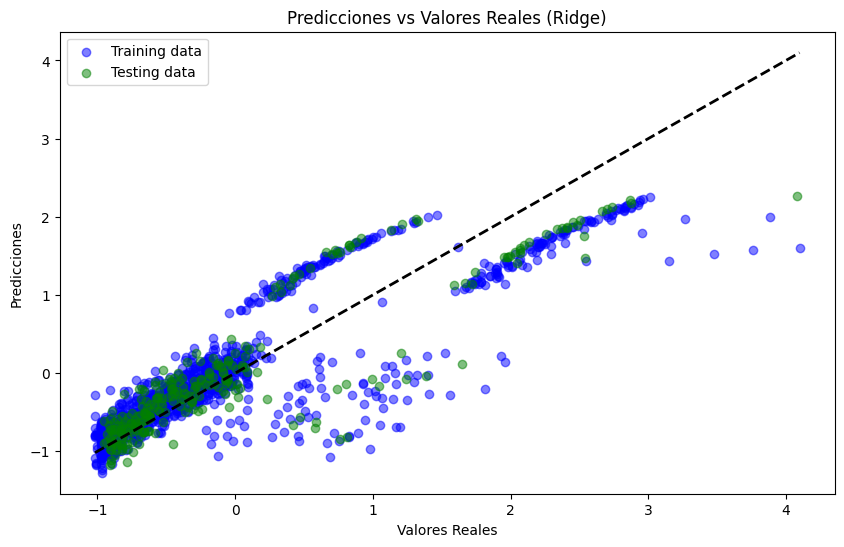

In [81]:
# Graficar los resultados de entrenamiento
plt.figure(figsize=(10, 6))
plt.scatter(y_train_scaled, y_pred_ridge_train, color='blue', label='Training data', alpha=0.5)
# Graficar los resultados de prueba
plt.scatter(y_test_scaled, y_pred_ridge_test, color='green', label='Testing data', alpha=0.5)

# Línea diagonal ideal
plt.plot([y_train_scaled.min(), y_train_scaled.max()], [y_train_scaled.min(), y_train_scaled.max()], 'k--', lw=2)

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (Regresion Ridge)')
plt.legend()
plt.show()

## Random Forest Regresion

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split

In [71]:
# Separar las características (X) y la variable objetivo (y)
X = data_pre.drop('charges', axis=1).values
y = data_pre['charges'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5)
cv_mean = np.mean(cv_scores)

print(f'CV : {cv_mean:.3f}')
print(f'R2_score (train) : {r2_train:.3f}')
print(f'R2_score (test) : {r2_test:.3f}')
print(f'RMSE : {rmse:.3f}')

CV : 0.826
R2_score (train) : 0.974
R2_score (test) : 0.863
RMSE : 0.381


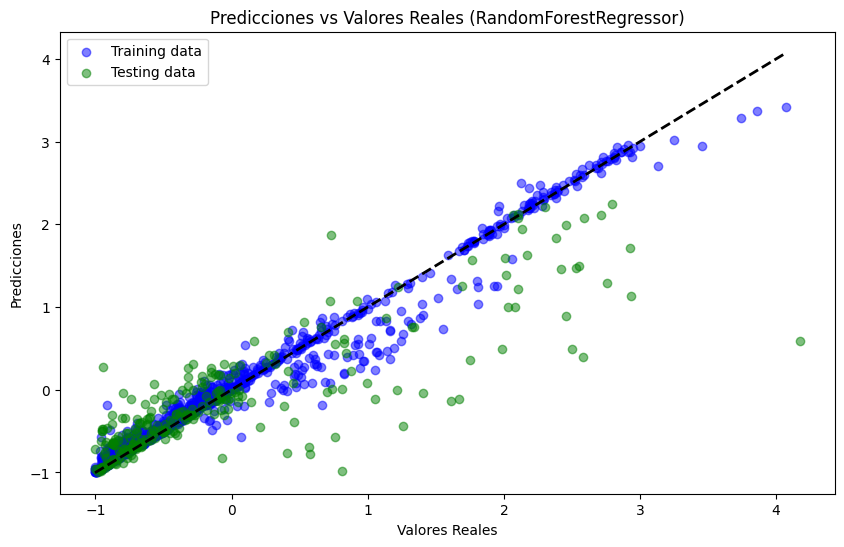

In [83]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data', alpha=0.5)

# Graficar los resultados de prueba
plt.scatter(y_test, y_test_pred, color='green', label='Testing data', alpha=0.5)

# Línea diagonal ideal
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (RandomForestRegressor)')
plt.legend()
plt.show()

##KNN

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split

In [70]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

cv_scores = cross_val_score(knn_regressor, X_train, y_train, cv=5)
cv_mean = np.mean(cv_scores)

print(f'CV : {cv_mean:.3f}')
print(f'R2_score (train) : {r2_train:.3f}')
print(f'R2_score (test) : {r2_test:.3f}')
print(f'RMSE : {rmse:.3f}')

CV : 0.649
R2_score (train) : 0.793
R2_score (test) : 0.693
RMSE : 0.571


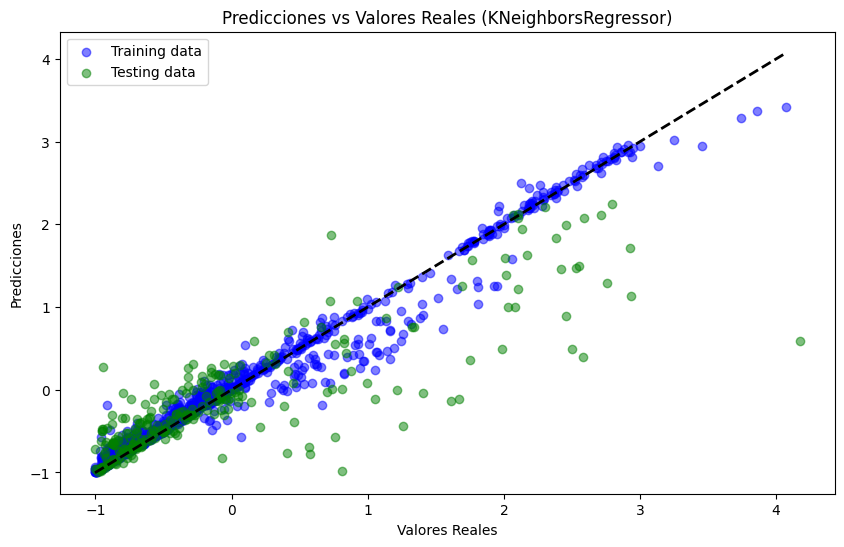

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data', alpha=0.5)

# Graficar los resultados de prueba
plt.scatter(y_test, y_test_pred, color='green', label='Testing data', alpha=0.5)

# Línea diagonal ideal
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)

plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales (KNeighborsRegressor)')
plt.legend()
plt.show()

##Iteración 1

In [73]:
for col in data.columns:
    print('Total de valors nulos de la coumna', col, '=', data[col].isna().sum())

Total de valors nulos de la coumna age = 0
Total de valors nulos de la coumna sex = 0
Total de valors nulos de la coumna bmi = 0
Total de valors nulos de la coumna children = 0
Total de valors nulos de la coumna smoker = 0
Total de valors nulos de la coumna region = 0
Total de valors nulos de la coumna charges = 0


##Iteración 2

In [72]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
charges : Skewness 1.516 and  Kurtosis 1.606


##Iteración 3

In [74]:
print('Printing Skewness and Kurtosis for all columns')
print()
for col in list(data_copy.columns):
    print('{0} : Skewness {1:.3f} and  Kurtosis {2:.3f}'.format(col,data_copy[col].skew(),data_copy[col].kurt()))

Printing Skewness and Kurtosis for all columns

age : Skewness 0.056 and  Kurtosis -1.245
sex : Skewness 0.021 and  Kurtosis -2.003
bmi : Skewness 0.284 and  Kurtosis -0.051
children : Skewness 0.938 and  Kurtosis 0.202
smoker : Skewness 1.465 and  Kurtosis 0.146
region : Skewness -0.038 and  Kurtosis -1.329
charges : Skewness 1.516 and  Kurtosis 1.606


# FASE 5 : EVALUACION DE MODELOS

---


Regresión lineal:

    CV Linear Regression : 0.745
    R2_score (train) : 0.741
    R2_score (test) : 0.783
    RMSE : 0.480

Ridge Regrión:

    CV : 0.826
    R2 score (train) : 0.741
    R2 score (test) : 0.784
    RMSE : 0.465

  Random Forest Regresion:

    CV : 0.826
    R2_score (train) : 0.974
    R2_score (test) : 0.863
    RMSE : 0.381

   KNN:

    CV : 0.649
    R2_score (train) : 0.793
    R2_score (test) : 0.693
    RMSE : 0.571





